In [73]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd

In [99]:
df = pd.read_csv("cleaned.csv",encoding="utf-16")

In [100]:
y = df["real_rent"]
X = df.drop(["real_rent","name","url"],axis=1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [102]:
lgb_train = lgb.Dataset(X_train,y_train)
lgb_eval = lgb.Dataset(X_test,y_test,reference=lgb_train)

In [103]:
lgb_params = {
    "object": "regression",
    "metric": "rmse",
    "num_leaves":80
}

In [104]:
model = lgb.train(lgb_params, lgb_train, valid_sets=lgb_eval, verbose_eval=-1)

In [105]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [106]:
print(r2_score(y_test,y_pred))

0.8171110579130221


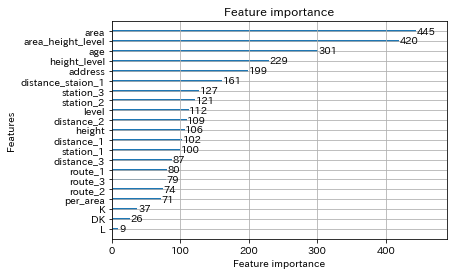

In [107]:
lgb.plot_importance(model)

In [108]:
pred = list(model.predict(X,num_iteration=model.best_iteration))
pred = pd.Series(pred, name="prediction")
diff = pd.Series(df["real_rent"]-pred, name="difference")
df = pd.concat([df, pred, diff],axis = 1)

In [109]:
df = df[["name","age","real_rent","prediction","difference","url"]]

In [110]:
df = df.sort_values("difference")

In [111]:
df.to_csv("predictions.csv",encoding="utf-16")